In [1]:
import pandas as pd
import numpy as np
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

In [2]:
class color:
  PURPLE = '\033[95M'
  CYAN = '\033[96M'
  DARYCYAN = '\033[36M'
  BLUE = '\033[94M'
  GREEN ='\033[92M'
  YELLOW = '\033[93M'
  RED = '\033[91M'
  BOLD = '\033[1M'
  UNDERLINE = '\033[4M'
  END = '\033[0M'

In [3]:
# headers = ["age", "workclass", "fnlwgt", "education", "education-num", "martial-status", "occupation", "relationship",
#            "race", "sex","capital-gains", "capital-loss", "hours-per-week", "native-country", "income"]

census_income = fetch_ucirepo(id=20) 
# df = pd.read_csv(url, header=None, names=headers, error_bad_lines=False, na_values="null")
# df.head(10)

X = census_income.data.features 
y = census_income.data.targets

In [ ]:
# check feature types to help see what you might need to encode
X.dtypes

In [4]:
# Select columns of types object and copies them into own dataframe!
categorical_X = X.select_dtypes(include=['object']).copy()
categorical_X

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States
48838,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States


In [5]:
# View Nan values (checks for every row (Y=1) if there is null, if there is return true and filters out df)
categorical_X_NaN = categorical_X[categorical_X.isnull().any(axis=1)]
categorical_X_NaN

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32565,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States
32567,NaN,HS-grad,Never-married,NaN,Unmarried,Black,Male,United-States
32574,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,United-States
32580,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,NaN
32583,NaN,7th-8th,Divorced,NaN,Not-in-family,White,Female,United-States
...,...,...,...,...,...,...,...,...
48769,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States
48800,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,Canada
48812,NaN,Assoc-voc,Married-civ-spouse,NaN,Husband,White,Male,United-States
48826,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,NaN


In [6]:
# Which features have NaN values?
categorical_X_NaN_features = categorical_X.columns[categorical_X.isna().any()].tolist()
categorical_X_NaN_features

['workclass', 'occupation', 'native-country']

In [7]:
# Impute all features that have NaN with most frequent
from sklearn.impute import SimpleImputer

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# impute value for workclass
imputer = imputer.fit(X[['workclass']])
X['workclass'] = imputer.transform(X[['workclass']]).ravel()

# impute value for occupation
imputer = imputer.fit(X[["occupation"]])
X["occupation"] = imputer.transform(X[["occupation"]]).ravel()

# impute value for native-country
imputer = imputer.fit(X[["native-country"]])
X["native-country"] = imputer.transform(X[["native-country"]]).ravel()

/tmp/ipykernel_11868/2630745479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'] = imputer.transform(X[['workclass']]).ravel()
/tmp/ipykernel_11868/2630745479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["occupation"] = imputer.transform(X[["occupation"]]).ravel()
/tmp/ipykernel_11868/2630745479.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [9]:
# recreate dataframe with only categorical features
categorical_X = X.select_dtypes(include=['object']).copy()
# recheck to find any null values 
categorical_X_NaN = categorical_X[categorical_X.isnull().any(axis=1)]
# recheck to see which features are null
categorical_X_NaN_features = categorical_X_NaN.columns[categorical_X_NaN.isna().any()].to_list()
categorical_X_NaN_features

[]

## Binary encoder
One two values for categorial nomial column

In [11]:
# Use binary encoding for the sex feature
from sklearn.preprocessing import LabelBinarizer

# How many different sex feature value types
# len(X["sex"].unique())
print(color.BOLD + color.PURPLE + "\nHow many different sex features types?" + color.END)
# Counts how many observations of each type of sex!
print(X["sex"].value_counts())


How many different sex features types?
Male      32650
Female    16192
Name: sex, dtype: int64


In [13]:
label_style = LabelBinarizer()
# can use pd.Series (unlike encoder)
label_results = label_style.fit_transform(X["sex"]) 
print("\nLabelBinarizer of sex feature:")
# Create a new column (columns are pd dataframes) with sex encoding
X["sex_code"] = pd.DataFrame({"sex": label_results[:, 0]})
X[["sex", "sex_code"]]


LabelBinarizer of sex feature:


,sex,sex_code
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Female,0
...,...,...
48837,Female,0
48838,Male,1
48839,Male,1
48840,Male,1


## Label Encoder 
multiple value categorical nomial column

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X["workclass_code"] = label_encoder.fit_transform(X["workclass"])
X[["workclass", "workclass_code"]]

,workclass,workclass_code
0,State-gov,7
1,Self-emp-not-inc,6
2,Private,4
3,Private,4
4,Private,4
...,...,...
48837,Private,4
48838,Private,4
48839,Private,4
48840,Private,4


## One hot encoding
to reduce issue with ordinality in label encoder above (in some algorithms may induce that)

In [23]:
categorical_X["workclass"].value_counts()

Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [24]:
pd.get_dummies(categorical_X, columns=["workclass"]).head()

,education,marital-status,occupation,relationship,race,sex,native-country,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0,0,0,0,0,0,0,1,0
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0,0,0,0,0,0,1,0,0
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0,0,0,0,1,0,0,0,0
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0,0,0,0,1,0,0,0,0
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0,0,0,0,1,0,0,0,0


## Normalisation
This help scale data down, can help better train the model when there are extreme differences in values

In [4]:
import numpy as np
import pandas as pd

data = np.array([[9999999, 2, 0, 9], [35,8, 4, 7], [27,23,1,99]])
data_raw = pd.DataFrame({"Column1": data[:, 0],  "Column2": data[:, 1], "Column3": data[:, 2], "Column4": data[:, 3]})

In [5]:
from sklearn import preprocessing

# normalize the data attributes
normalized_data = preprocessing.normalize(data)
dataset = pd.DataFrame({"Column1": normalized_data[:, 0], "Column2": normalized_data[:, 1], "Column3": normalized_data[:, 2], "Column4": normalized_data[:, 3]})
print(dataset)

    Column1       Column2   Column3       Column4
0  1.000000  2.000000e-07  0.000000  9.000001e-07
1  0.951171  2.174106e-01  0.108705  1.902342e-01
2  0.256736  2.187008e-01  0.009509  9.413641e-01


## Standardisation
Helpful when you want your data to have a mean of 0 and a std of 1. Helpful format for some models/transformations

In [6]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data_raw)
dataset = pd.DataFrame(standardized_data, columns=["Column1", "Column2", "Column3", "Column4"])
# dataset = pd.DataFrame({"Column1": standardized_data[:, 0], "Column2" : standardized_data[:, 1], "Column3" : standardized_data[:, 2], "Column4" : standardized_data[:, 3]})
print(dataset)

    Column1   Column2   Column3   Column4
0  1.414214 -1.019049 -0.980581 -0.683672
1 -0.707106 -0.339683  1.372813 -0.730286
2 -0.707108  1.358732 -0.392232  1.413957


## Categorical Binning

This is helpful to group information together and gain better insight on data. This could be helpful when needing to reduce features or during feature abstraction


In [7]:
countries = pd.Series([
    'United States',
    'Canada',
    'Spain',
    'Italy',
    'Chile',
    'Brazil',
    'North Korea',
    'Vietnam',
    'Thailand',
    'Malaysia',
    'Mayanmar',
    'Iceland',
    'Germany',
    'Cuba',
    'Mexico'
], name = "Countries")
groups = {
    'North America' : ('United States', 'Canada', 'Iceland', 'Greenland', 'Mexico'),
    'Europe' : ('France', 'Germany', 'United Kingdom', 'Belgium', 'Spain', 'Italy', 'Poland'),
    'South America': ('Chile', 'Brazil', 'Peru', 'Columbia', 'Ecuador'),
    'Asia': ('North Korea', 'Vietnam', 'Thailand', 'Malaysia', 'Mayanmar'),
}

In [8]:
from typing import Any

def country_group_map(series: pd.Series, groups: dict, othervalue:Any=-1) -> pd.Series:
    # Assign the dictionary pairs
    groups = {z: j for j,r in groups.items() for z in r}
    return series.map(groups).fillna(othervalue)

grouped_countries = country_group_map(countries, groups, othervalue='other')

# pd.concat combines series into dataframe
df = pd.concat([countries.rename('Countries'), grouped_countries.rename('Grouped Countries')], axis=1)
df.head()

,Countries,Grouped Countries
0,United States,North America
1,Canada,North America
2,Spain,Europe
3,Italy,Europe
4,Chile,South America


<Axes: xlabel='Grouped Countries'>

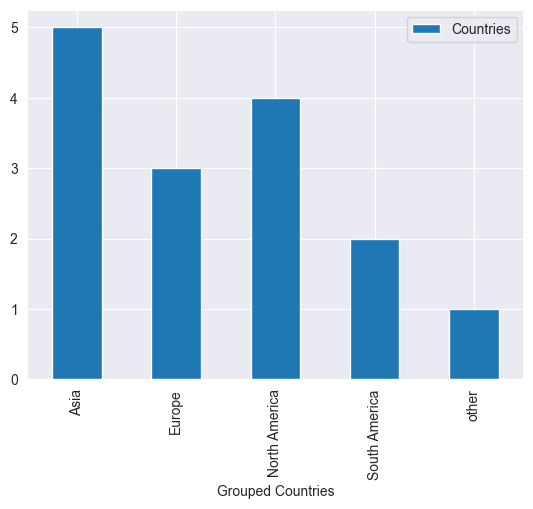

In [9]:
data = df.groupby('Grouped Countries').count() # y
data.plot.bar(stacked=True)

## Nummerical Binning
Helpful when you have continuous data that you want to group to get better insights into.

In [24]:
url = "https://github.com/saadharoon27/US-Sales-Data-Analysis-On-Excel/blob/main/Raw%20Data.csv?raw=true" # put raw=true to get the raw file link

sales_df = pd.read_csv(url, index_col=0)
sales_df.head()

,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit
Order Date,,,,,,,,
03-01-2014,Darren Powers,Texas,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,5.55
04-01-2014,Phillina Ober,Illinois,Office Supplies,Labels,Avery 508,11.78,3,4.27
04-01-2014,Phillina Ober,Illinois,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,-64.77
04-01-2014,Phillina Ober,Illinois,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,-5.49
05-01-2014,Mick Brown,Pennsylvania,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,4.88


In [25]:
sales_df['Actual Product Price'] = sales_df['Sales'] - sales_df['Profit'] / sales_df['Quantity'] 
sales_df.head()

,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Actual Product Price
Order Date,,,,,,,,,
03-01-2014,Darren Powers,Texas,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,5.55,13.675000
04-01-2014,Phillina Ober,Illinois,Office Supplies,Labels,Avery 508,11.78,3,4.27,10.356667
04-01-2014,Phillina Ober,Illinois,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,-64.77,294.330000
04-01-2014,Phillina Ober,Illinois,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,-5.49,6.285000
05-01-2014,Mick Brown,Pennsylvania,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.54,3,4.88,17.913333


In [43]:
sales_df['Product Name'].value_counts()
sales_df['Sales'].describe()

count     9994.000000
mean       229.858022
std        623.245131
min          0.440000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [54]:
# normalise sales values to better visualise histogram
from sklearn.preprocessing import minmax_scale

df_sales = minmax_scale(df['Sales'])
df['Sales'] = pd.Series(df_sales)

<Axes: ylabel='Frequency'>

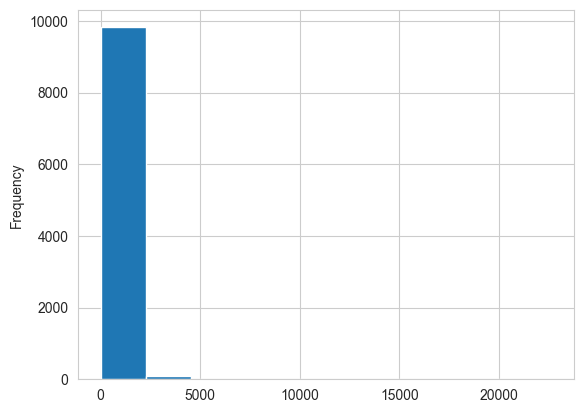

In [55]:
import seaborn as sns

sns.set_style("whitegrid")
df = sales_df.groupby(['Customer Name', 'Product Name'])['Sales'].sum().reset_index()
df['Sales'].plot(kind='hist')

## Quantile binning example

Unequal sized bins, but distribute data evenly across bins

In [60]:
print('Quantile base discretization function that divides up the data into ')
sales_df['quartile_price_quartiles'] = pd.qcut(sales_df['Sales'], q=4)
sales_df['quartile_price_deciles'] = pd.qcut(sales_df['Sales'], q=10, precision=0)
bin_labels_5 = ['Rookie', 'Sophomore', 'Junior', 'Senior', 'Professional']
sales_df['quantile_price_quintiles'] = pd.qcut(sales_df['Sales'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5) 
sales_df.head()

,Customer Name,State,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Actual Product Price,quartile_price_quartiles,quartile_price_deciles,quantile_price_quintiles
Order Date,,,,,,,,,,,,
03-01-2014,Darren Powers,Texas,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Forms/Pg., 200 Dupl. Sets/Book",16.45,2,5.55,13.675000,"(0.439, 17.28]","(14.0, 21.0]",Sophomore
04-01-2014,Phillina Ober,Illinois,Office Supplies,Labels,Avery 508,11.78,3,4.27,10.356667,"(0.439, 17.28]","(8.0, 14.0]",Rookie
04-01-2014,Phillina Ober,Illinois,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.74,3,-64.77,294.330000,"(209.94, 22638.48]","(158.0, 281.0]",Senior
04-01-2014,Phillina Ober,Illinois,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.54,2,-5.49,6.285000,"(0.439, 17.28]","(-1.0, 8.0]",Rookie
05-01-2014,Mick Brown,Pennsylvania,Office Supplies,Art,"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",19.54,3,4.88,17.913333,"(17.28, 54.49]","(14.0, 21.0]",Sophomore


In [61]:
print("\nWhat ranges identify bins?: ")
results, bin_edges = pd.qcut(sales_df['Sales'], q=[0, .2, .4, .6, .8, 1], labels=bin_labels_5, retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5), columns=['Threshold', 'Tier'])

print(results_table)


What ranges identify bins?: 
   Threshold          Tier
0       0.44        Rookie
1      13.78     Sophomore
2      34.25        Junior
3      89.81        Senior
4     281.37  Professional


In [62]:
print('\ncheck bin distributions: ')
print(sales_df['quantile_price_quintiles'].value_counts())


check bin distributions: 
quantile_price_quintiles
Rookie          2000
Senior          2000
Sophomore       1999
Professional    1998
Junior          1997
Name: count, dtype: int64


## Cut binning
Equal size bin, doesn't distribute data evenly across bins

In [59]:
sales_df['Sales'].describe()

count     9994.000000
mean       229.858022
std        623.245131
min          0.440000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [58]:
bins = pd.cut(sales_df['Sales'], bins=4)
print(bins.value_counts())

Sales
(-22.198, 5659.95]      9979
(5659.95, 11319.46]       12
(16978.97, 22638.48]       2
(11319.46, 16978.97]       1
Name: count, dtype: int64
